### Vehicle Collision Analysis

Analyst: Daniel Elkin <br />
Date: 06/12/2019

In [270]:
import numpy as np
import matplotlib as plt
import pandas as pd

In [177]:
%matplotlib inline

#### I. Data Loading and Validation

In [276]:
data_file = "data/small.csv"
# data_file = "data/NYPD_Motor_Vehicle_Collisions.csv"

rows = !wc -l < $data_file
rows = int(rows[0])

print(f"There are {rows} rows. The first of which is: \n")

There are 1000 rows. The first of which is: 



In [228]:
df = pd.read_csv(data_file, 
                 index_col="DATE_TIME",
                 parse_dates=[["DATE", "TIME"]],
                 usecols=["DATE", "TIME", "UNIQUE KEY", "BOROUGH"]
                )

In [230]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509269 entries, 2019-06-04 00:00:00 to 2012-07-01 09:59:00
Data columns (total 2 columns):
BOROUGH       1056352 non-null object
UNIQUE KEY    1509269 non-null int64
dtypes: int64(1), object(1)
memory usage: 34.5+ MB


In [231]:
df.rename(columns=lambda c: c.lower().replace(" ", "_"), inplace=True)
df.index.names=["date_time"]

In [232]:
df.head()

,borough,unique_key
date_time,,
2019-06-04,BRONX,4144652
2019-06-04,BRONX,4145339
2019-06-04,BROOKLYN,4145344
2019-06-04,MANHATTAN,4145985
2019-06-04,MANHATTAN,4144953


In [255]:
df.isnull().sum()

borough       452917
unique_key         0
dtype: int64

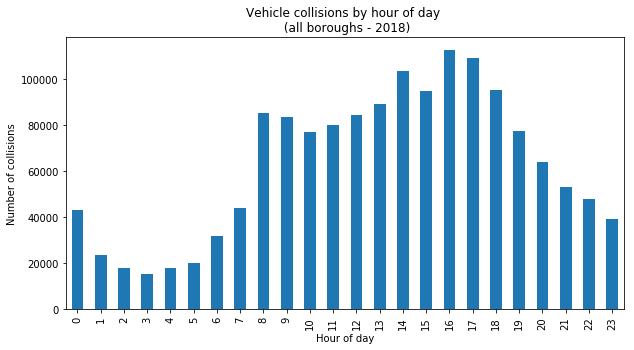

In [233]:
group = df.groupby(df.index.hour).count().unique_key
ax = group.plot(kind="bar", 
                figsize=(10, 5),
                title="Vehicle collisions by hour of day \n (all boroughs - 2018)")

ax.set_xlabel("Hour of day")
_ = ax.set_ylabel("Number of collisions")

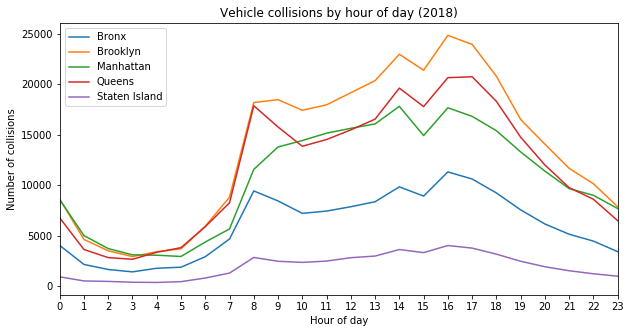

In [275]:
# Note that we have missing data - possible borough is recorded more often for Brooklyn?
group = df.groupby([df.index.hour, "borough"]).unique_key.count().unstack()

boroughs = [str(b).title() 
            for b in df.borough.dropna().unique()]
ax = group.plot(figsize=(10, 5), xticks=range(0, 24), title="Vehicle collisions by hour of day (2018)")
ax.set_xlabel("Hour of day")
ax.set_ylabel("Number of collisions")
_ = ax.legend(boroughs)

In [247]:
len(df[(df.index.hour >= 15) & (df.index.hour < 16) & (df.borough == "MANHATTAN")])


14910

In [266]:
df.borough.unique()

array(['BRONX', 'BROOKLYN', 'MANHATTAN', nan, 'QUEENS', 'STATEN ISLAND'], dtype=object)

#### Vehicle type

In [282]:
df = pd.read_csv(data_file,
                 index_col="UNIQUE KEY",
#                  usecols=["DATE", "TIME", "UNIQUE KEY", "BOROUGH"]
                )

In [284]:
df.rename(columns=lambda c: c.lower().replace(" ", "_"), inplace=True)
df.index.names=["unique_key"]

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 4144652 to 4145396
Data columns (total 28 columns):
date                             999 non-null object
time                             999 non-null object
borough                          684 non-null object
zip_code                         684 non-null float64
latitude                         915 non-null float64
longitude                        915 non-null float64
location                         915 non-null object
on_street_name                   745 non-null object
cross_street_name                502 non-null object
off_street_name                  254 non-null object
number_of_persons_injured        999 non-null int64
number_of_persons_killed         999 non-null int64
number_of_pedestrians_injured    999 non-null int64
number_of_pedestrians_killed     999 non-null int64
number_of_cyclist_injured        999 non-null int64
number_of_cyclist_killed         999 non-null int64
number_of_motorist_injured       999 non

In [286]:
df.describe()

,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
count,684.000000,915.000000,915.000000,999.000000,999.0,999.000000,999.0,999.000000,999.0,999.000000,999.0
mean,10908.352339,40.725401,-73.911123,0.280280,0.0,0.039039,0.0,0.034034,0.0,0.207207,0.0
std,530.502295,0.078767,0.086977,0.613412,0.0,0.208721,0.0,0.186849,0.0,0.573381,0.0
min,10001.000000,40.504290,-74.246086,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
25%,10457.000000,40.671351,-73.964628,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
50%,11212.000000,40.724260,-73.916760,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
75%,11362.000000,40.773065,-73.857216,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
max,11694.000000,40.909590,-73.713120,5.000000,0.0,3.000000,0.0,2.000000,0.0,5.000000,0.0


In [292]:
df.vehicle_type_code_1.value_counts()

Sedan                                  449
Station Wagon/Sport Utility Vehicle    368
Pick-up Truck                           46
Taxi                                    36
Box Truck                               24
Bus                                     17
Van                                     12
Tractor Truck Diesel                    12
Bike                                     7
Motorcycle                               6
Convertible                              2
Tanker                                   2
Ambulance                                2
Carry All                                1
PK                                       1
Dump                                     1
Garbage or Refuse                        1
TRLR                                     1
FIRET                                    1
Chassis Cab                              1
Open Body                                1
Name: vehicle_type_code_1, dtype: int64

In [293]:
df.vehicle_type_code_2.value_counts()

Sedan                                  336
Station Wagon/Sport Utility Vehicle    287
Bike                                    33
Taxi                                    33
Pick-up Truck                           30
Box Truck                               27
Bus                                     22
Flat Bed                                 7
Tractor Truck Diesel                     7
Dump                                     4
Carry All                                3
Ambulance                                3
Tractor Truck Gasoline                   2
Motorcycle                               2
Concrete Mixer                           2
Van                                      2
Tow Truck / Wrecker                      2
PK                                       2
WHITE                                    1
Moped                                    1
Vanette                                  1
Convertible                              1
Tanker                                   1
BACK       

In [306]:
assert len(df[df["number_of_persons_killed"] != df["number_of_pedestrians_killed"] + 
         df["number_of_cyclist_killed"] + df["number_of_motorist_killed"]]) == 0

assert len(df[df["number_of_persons_injured"] != df["number_of_pedestrians_injured"] + 
         df["number_of_cyclist_injured"] + df["number_of_motorist_injured"]]) == 0


In [316]:
df[df.vehicle_type_code_1 == "Sedan"].number_of_persons_injured.mean()

0.2962138084632517

In [317]:
df[df.vehicle_type_code_1 == "Taxi"].number_of_persons_injured.mean()

0.3055555555555556

In [338]:
df["vehicle_type"] = np.where(df.vehicle_type_code_1 < df.vehicle_type_code_2, df.vehicle_type_code_1 + "-" + df.vehicle_type_code_2, df.vehicle_type_code_2 + "-" + df.vehicle_type_code_1)

In [348]:
df.groupby("vehicle_type").sum().number_of_persons_injured.sort_values(ascending=False)

vehicle_type
Sedan-Station Wagon/Sport Utility Vehicle                                  63
Sedan-Sedan                                                                46
Station Wagon/Sport Utility Vehicle-Station Wagon/Sport Utility Vehicle    44
Bike-Sedan                                                                 16
Bike-Station Wagon/Sport Utility Vehicle                                   10
Sedan-Taxi                                                                  6
Station Wagon/Sport Utility Vehicle-Taxi                                    6
Bus-Station Wagon/Sport Utility Vehicle                                     4
Sedan-Tow Truck / Wrecker                                                   4
Bus-Bus                                                                     4
Pick-up Truck-Station Wagon/Sport Utility Vehicle                           3
Box Truck-Station Wagon/Sport Utility Vehicle                               3
Bike-Taxi                                          

In [349]:
df.groupby("vehicle_type").mean().number_of_persons_injured.sort_values(ascending=False)

vehicle_type
Bus-Bus                                                                    4.000000
Chassis Cab-Sedan                                                          2.000000
Motorcycle-Station Wagon/Sport Utility Vehicle                             2.000000
Sedan-Tow Truck / Wrecker                                                  2.000000
School Bus-Sedan                                                           1.000000
Bike-Box Truck                                                             1.000000
Garbage or Refuse-Motorcycle                                               1.000000
Bike-Taxi                                                                  1.000000
Concrete Mixer-Sedan                                                       1.000000
Bike-Bike                                                                  1.000000
Ambulance-Sedan                                                            1.000000
Bike-Sedan                                                     

In [363]:
from scipy.stats import ttest_ind
a = df[df.vehicle_type == "Bike-Station Wagon/Sport Utility Vehicle"]
b = df[df.vehicle_type == "Bike-Bike"]

In [364]:
len(a)

12

In [365]:
len(b)

1

In [366]:
ttest_ind(a["number_of_persons_injured"], b["number_of_persons_injured"])

/Users/Bobo/anaconda2/envs/digit_recognition/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3126: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/Bobo/anaconda2/envs/digit_recognition/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)